**Oppgave 3b**


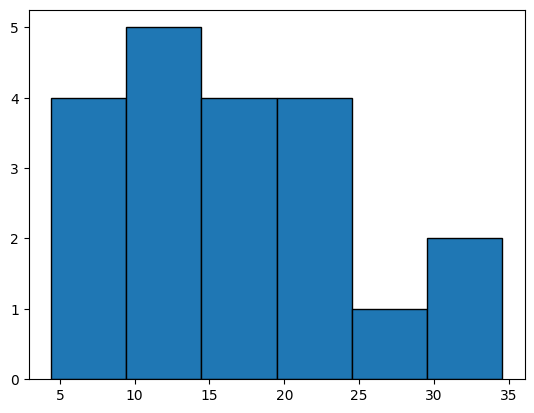

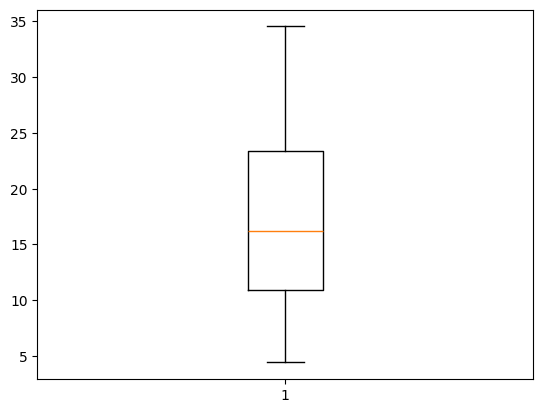

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([7.98,10.82,15.88,17.00,24.22,12.20,8.17,16.53,7.46,
 14.31,34.55,19.46,20.21,13.58,10.98,4.42,24.92,30.29,
 23.45,23.36]) 

plt.hist(data, bins=6, edgecolor='black')
plt.show()

plt.boxplot(data)
plt.show()


Plottene tyder på en økning, selv med tanke på at $\sigma = \sqrt{\frac{r^2}{a}}\approx 5.6$ er første inntrykket at $r_{0}$ har økt.

**Oppgave 4a**

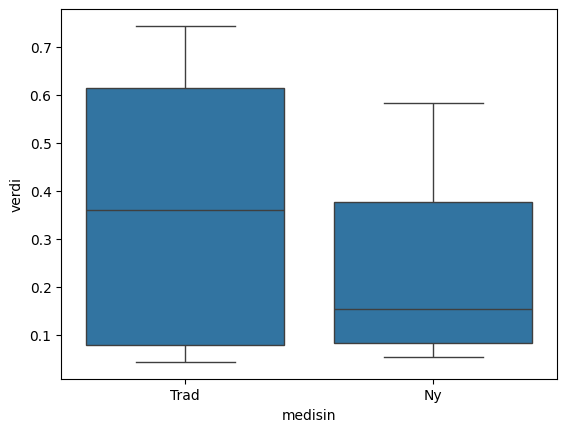

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x = [0.189,0.743,0.605,0.044,0.091,0.045,0.532,0.642,
 0.397,0.583,0.355,0.054,0.155,0.066,0.099]
data = pd.DataFrame({'verdi': x, 'medisin':
 ['Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Trad', 'Ny', 'Ny', 'Ny', 'Ny', 'Ny', 'Ny', 'Ny']})
sns.boxplot(x='medisin',y='verdi',data=data)
plt.show()


Det ser ut som at den nye medisinen er betydelig mye bedre en den gamle, siden gjennomsnittet er lavere og spredningen er lavere.

La $H_{0}: \mu _{ny} \geq \mu _{trad}$ og $H_{1}: \mu _{ny} < \mu _{trad}$ og la Testobservator = $\bar{X}_{ny} - \bar{X}_{trad}$, også forkaster vi $H_{0}$ hvis Testobservatoren er tilstrekkelig liten.


In [9]:
import numpy as np
from random import sample

# Observerte blodprøveverdier
trad_med = [0.189, 0.743, 0.605, 0.044, 0.091, 0.045, 0.532, 0.642]
ny_med = [0.397, 0.583, 0.355, 0.054, 0.155, 0.066, 0.099]

# Kombiner dataene
x = trad_med + ny_med
n_trad = len(trad_med)
n_simuleringer = 10000  # Antall simuleringer

# Definer funksjon for testobservator
def test_statistic(data, n_trad):
    mean_trad = np.mean(data[:n_trad])
    mean_ny = np.mean(data[n_trad:])
    return mean_ny - mean_trad

# Beregn observert testobservator
observed_statistic = test_statistic(x, n_trad)

# Beregn p-verdi ved hjelp av permutasjonstest
count = 0
for _ in range(n_simuleringer):
    permuted_data = sample(x, len(x))  # Stokker dataene
    simulated_statistic = test_statistic(permuted_data, n_trad)
    if simulated_statistic <= observed_statistic:
        count += 1

p_value = count / n_simuleringer
print("Observert verdi av testobservator:", observed_statistic)
print("Estimat av p-verdi:", p_value)

Observert verdi av testobservator: -0.11723214285714284
Estimat av p-verdi: 0.1946
